In [79]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [80]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set() # seaborn 속성을 기본값으로 설정

파일에서 데이터를 읽어들임

In [81]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

#from enum import Enum
class Columns:
    # 원래 존재하는 항목
    PassengerId = "PassengerId"
    Survived = "Survived"
    Pclass = "Pclass"
    Name = "Name"
    Sex = "Sex"
    Age = "Age"
    SibSp = "SibSp"
    Parch = "Parch"
    Ticket = "Ticket"
    Fare = "Fare"
    Cabin = "Cabin"
    Embarked = "Embarked"
    
    # 새로 생성하는 항목
    Title = "Title"
    FareBand = "FareBand"
    Family = "Family"
    Deck = "Deck" # Cabin의 알파벳을 떼서 Deck을 지정한다.
    CabinExists = "CabinExists"

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test의 경우 예측에서 제출해야 하는 데이터이기에 Survived 항목이 없다.

In [83]:
print(test.head(n=test.shape[0]))

     PassengerId  Pclass                                               Name  \
0            892       3                                   Kelly, Mr. James   
1            893       3                   Wilkes, Mrs. James (Ellen Needs)   
2            894       2                          Myles, Mr. Thomas Francis   
3            895       3                                   Wirz, Mr. Albert   
4            896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5            897       3                         Svensson, Mr. Johan Cervin   
6            898       3                               Connolly, Miss. Kate   
7            899       2                       Caldwell, Mr. Albert Francis   
8            900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9            901       3                            Davies, Mr. John Samuel   
10           902       3                                   Ilieff, Mr. Ylio   
11           903       1                         Jon

## 입력 데이터 :

- **PassengerId** : 승객 번호<br>
- **Survived** : 생존여부(1: 생존, 0 : 사망)<br>
- **Pclass** : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)<br>
- **Name** : 승객 이름<br>
- **Sex** : 승객 성별 (male/female)<br>
- **Age** : 승객 나이(float) <br>
- **SibSp** : 동반한 형제자매, 배우자 수<br>
- **Parch** : 동반한 부모, 자식 수<br>
- **Ticket** : 티켓의 고유 넘버(문자열)<br>
- **Fare** 티켓의 요금(float)<br>
- **Cabin** : 객실 번호<br>
- **Embarked** : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)<br>



데이터가 존재하지 않는 feature들을 확인해 본다.

### 데이터 속성 확인

Pclass 에 따른 생존률

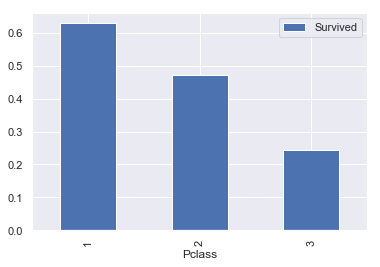

In [84]:
train[[Columns.Pclass, Columns.Survived]].groupby([Columns.Pclass]).mean().plot.bar()

성별에 따른 생존률

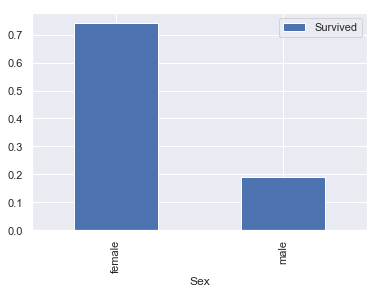

In [85]:
train[[Columns.Sex, Columns.Survived]].groupby([Columns.Sex]).mean().plot.bar()

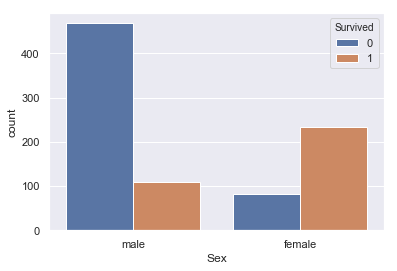

In [86]:
sns.countplot(x=Columns.Sex, hue=Columns.Survived, data=train)

Age에 따른 생존률

Age 분포

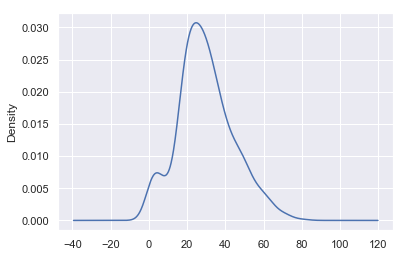

In [87]:
train[Columns.Age].plot.kde()

나이대를 분할하여 bar graph로 출력

Age : 0  ~  80
gap: 6
[-1, 0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, inf]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


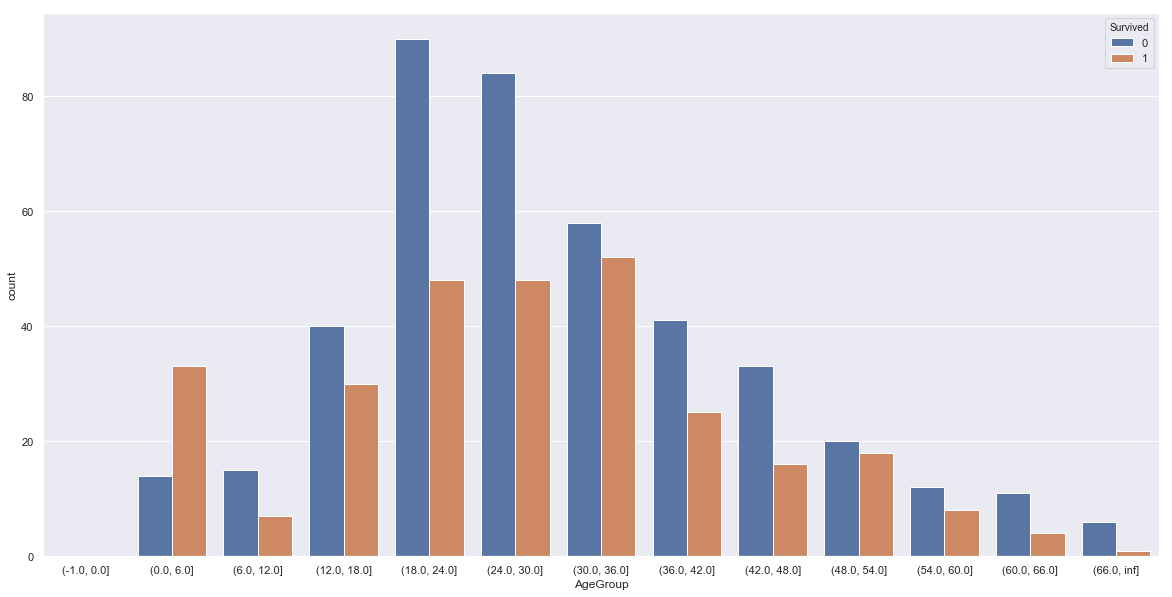

In [88]:
df = train[train[Columns.Age].isnull() == False]
#df.describe()

# 나이대로 나누어서 출력해 본다.
age_min = df[Columns.Age].min().astype('int')
age_max = df[Columns.Age].max().astype('int')
print("Age :", age_min, " ~ ", age_max)
gap = ((age_max - age_min) / 12).astype(int)
print('gap:', gap)

bins = [-1]
for i in range(12):
    bins.append(i * gap)
bins.append(np.inf)
print(bins)

_df = df
_df['AgeGroup'] = pd.cut(_df[Columns.Age], bins)
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot('AgeGroup', hue=Columns.Survived, data=_df, ax=ax)

Pclass/Age에 따른 생존률 변화량

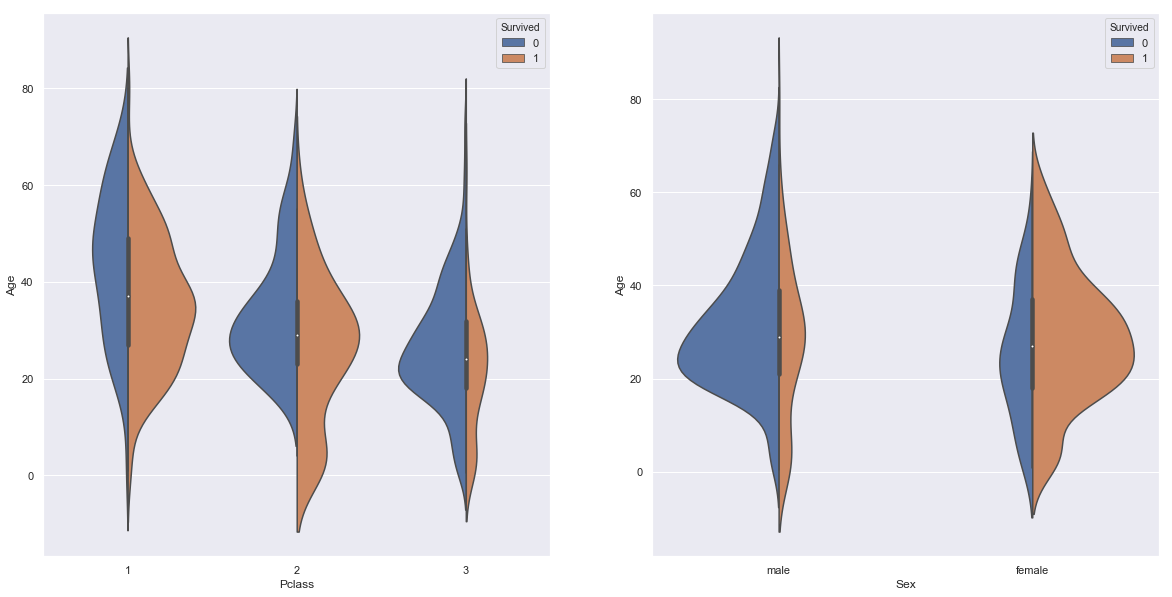

In [89]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
sns.violinplot(Columns.Pclass, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[0])
sns.violinplot(Columns.Sex, Columns.Age, hue=Columns.Survived, data=train, scale='count', split=True, ax=ax[1])

In [90]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

가족 수 ( Parch + SibSp + 1(자기자신))과 생존률을 비교해 본다.

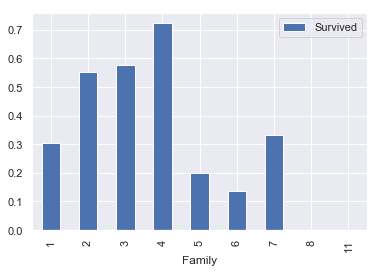

In [91]:
_train = train
_train['Family'] = _train[Columns.SibSp] + _train[Columns.Parch] + 1
_train[['Family', Columns.Survived]].groupby('Family').mean().plot.bar()

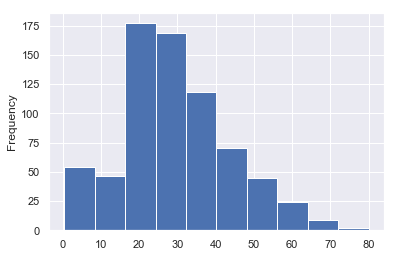

In [92]:
train[Columns.Age].plot.hist()

countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

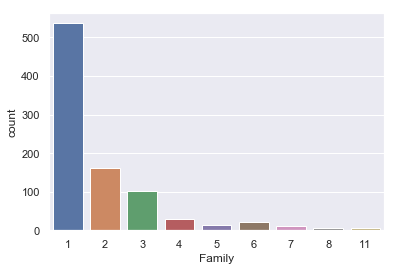

In [93]:
sns.countplot(x='Family', data=_train)

Family 별로 Survived값의 구성을 보여준다.

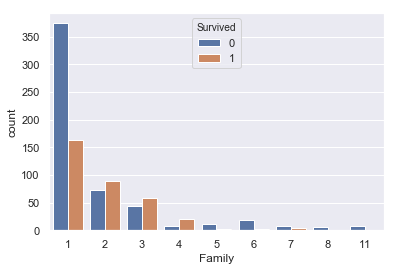

In [94]:
sns.countplot(x='Family', hue=Columns.Survived, data=_train)

### 데이터 가공

1. 비어있는 데이터(null)을 처리한다.<br>

###### 기존 feature들을 보완/가공
**Age** : null이 많고 나이가 중요할 것으로 판단되니 데이터를 채워야 할 필요가 있다.<br>
**Cabin** : null이 너무 많다.<br>
**Embarked** : null이 거의 없으므로 중요하지 않은 값으로 채워도 문제가 없어 보임<br>
**Parse, SibSp** : 합쳐서 Family로 만들고 삭제하자.

###### 새로운 feature를 추가
**Family** : Parch + SibSp + 1(자기자신)

## train/test를 따로 하지 말고, 합쳐서 처리하고 마지막(모델 넣기 직전)에 다시 분리한다.

In [95]:
train_len = train.shape[0]
'''
ignore_index=True로 하지 않으면 test의 인덱스가 0부터 시작해서 iterrow()등의 반복자를 
사용할 때 오동작한다.(0이 두개가 되는 등)
'''
merged = train.append(test, sort=False, ignore_index=True) 
print("merged len : ", merged.shape[0])

merged len :  1309


Parch와 SibSp를 Family로 변경하고 해당 항목들은 삭제한다.

In [96]:
merged[Columns.Family] = merged[Columns.Parch] + merged[Columns.SibSp] + 1
if Columns.Parch in merged:    
    merged = merged.drop([Columns.Parch], axis=1)
if Columns.SibSp in merged:
    merged = merged.drop([Columns.SibSp], axis=1)
    
merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


### Embarked 정리
빈 갯수가 몇개 없으므로 그냥 가장 많은 것으로 채운다.

In [97]:
most_embarked_label = merged[Columns.Embarked].value_counts().index[0]

merged = merged.fillna({Columns.Embarked : most_embarked_label})
merged.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309,1308.000000,295,1309,1309.000000
unique,NaN,NaN,NaN,1307,2,NaN,929,NaN,186,3,NaN
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,NaN,NaN,2,843,NaN,11,NaN,6,916,NaN
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,NaN,33.295479,NaN,NaN,1.883881
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,NaN,51.758668,NaN,NaN,1.583639
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,NaN,0.000000,NaN,NaN,1.000000
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,NaN,7.895800,NaN,NaN,1.000000
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,NaN,14.454200,NaN,NaN,1.000000
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,NaN,31.275000,NaN,NaN,2.000000


Name에서 호칭을 추출해서 새 항목(Title)을 추가하고 숫자값으로 변환한다.
Name은 지운다.

In [98]:
# Name에서 Title 추출(그냥 알파벳 끝에 .이 붙어 있는걸 추출한다.)
merged[Columns.Title] = merged.Name.str.extract('([A-Za-z]+)\. ', expand=False) # expand:True면 DataFrame을, False면 Series를 리턴한다.

print("initial titles : ", merged[Columns.Title].value_counts().index)
#initial titles :  Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Ms', 'Mlle', 'Major',
#                         'Sir', 'Jonkheer', 'Don', 'Mme', 'Countess', 'Lady', 'Dona', 'Capt'],

# 정리
merged[Columns.Title] = merged[Columns.Title].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
merged[Columns.Title] = merged[Columns.Title].replace(['Countess', 'Lady', 'Sir'], 'Royal')
merged[Columns.Title] = merged[Columns.Title].replace(['Miss', 'Mlle', 'Ms', 'Mme'], 'Mrs')
    
print(merged[[Columns.Title, Columns.Survived]].groupby(Columns.Title).mean())

idxs = merged[Columns.Title].value_counts().index # 많은 순서대로 정렬해서 오름차순으로 값을 매김
print(idxs)
mapping = {}
for i in range(len(idxs)):
    mapping[idxs[i]] = i + 1
print(mapping)

merged[Columns.Title] = merged[Columns.Title].map(mapping)


if Columns.Name in merged:
    merged = merged.drop([Columns.Name], axis=1)
    
merged.head()

initial titles :  Index(['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev', 'Col', 'Ms', 'Mlle',
       'Major', 'Mme', 'Jonkheer', 'Don', 'Lady', 'Sir', 'Dona', 'Countess',
       'Capt'],
      dtype='object')
        Survived
Title           
Master  0.575000
Mr      0.156673
Mrs     0.739550
Rare    0.285714
Royal   1.000000
Index(['Mr', 'Mrs', 'Master', 'Rare', 'Royal'], dtype='object')
{'Mr': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4, 'Royal': 5}


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,male,22.0,A/5 21171,7.2500,NaN,S,2,1
1,2,1.0,1,female,38.0,PC 17599,71.2833,C85,C,2,2
2,3,1.0,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1.0,1,female,35.0,113803,53.1000,C123,S,2,2
4,5,0.0,3,male,35.0,373450,8.0500,NaN,S,1,1


1    757
2    462
3     61
4     27
5      2
Name: Title, dtype: int64


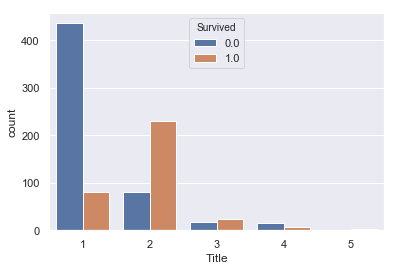

In [99]:
sns.countplot(x=Columns.Title, hue=Columns.Survived, data=merged)
print(merged[Columns.Title].value_counts())

Sex 항목을 숫자로 변경

In [100]:
mapping = {'male':0, 'female':1}
merged[Columns.Sex] = merged[Columns.Sex].map(mapping)

In [101]:
merged.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,S,2,1
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,C,2,2
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1.0,1,1,35.0,113803,53.1000,C123,S,2,2
4,5,0.0,3,0,35.0,373450,8.0500,NaN,S,1,1
5,6,0.0,3,0,NaN,330877,8.4583,NaN,Q,1,1
6,7,0.0,1,0,54.0,17463,51.8625,E46,S,1,1
7,8,0.0,3,0,2.0,349909,21.0750,NaN,S,5,3
8,9,1.0,3,1,27.0,347742,11.1333,NaN,S,3,2
9,10,1.0,2,1,14.0,237736,30.0708,NaN,C,2,2


### 비어있는 Age를 처리

Title로 적당히 추리한다. (너무 때려맞추기가 아닌지...?)

In [102]:
# {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5, 'Royal': 6}

mapping = {1:21, 2:28, 3:28, 4:40, 5:50, 6:60}
def guess_age(row):
    return mapping[row[Columns.Title]]

def fixup_age(df):
    for idx, row in df[df[Columns.Age].isnull() == True].iterrows():
        df.loc[idx, Columns.Age] = guess_age(row)
    return df
    
merged = fixup_age(merged)
merged.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309,1308.000000,295,1309,1309.000000,1309.000000
unique,NaN,NaN,NaN,NaN,NaN,929,NaN,186,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,11,NaN,6,916,NaN,NaN
mean,655.000000,0.383838,2.294882,0.355997,28.571176,NaN,33.295479,NaN,NaN,1.883881,1.514133
std,378.020061,0.486592,0.837836,0.478997,13.235687,NaN,51.758668,NaN,NaN,1.583639,0.696753
min,1.000000,0.000000,1.000000,0.000000,0.170000,NaN,0.000000,NaN,NaN,1.000000,1.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,NaN,7.895800,NaN,NaN,1.000000,1.000000
50%,655.000000,0.000000,3.000000,0.000000,27.000000,NaN,14.454200,NaN,NaN,1.000000,1.000000
75%,982.000000,1.000000,3.000000,1.000000,35.000000,NaN,31.275000,NaN,NaN,2.000000,2.000000


### Ticket 항목을 분석

In [103]:
merged[Columns.Ticket].unique().shape
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,S,2,1
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,C,2,2
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1.0,1,1,35.0,113803,53.1000,C123,S,2,2
4,5,0.0,3,0,35.0,373450,8.0500,NaN,S,1,1


ticket 항목 중 중복되는 것이 있다는 것을 알 수 있다.
중복되는 항목들의 Fare를 찾아보면 모두 같다.
===> ticket이 중복되었다고 돈을 나눠야 할 이유는 없을지도...

No Cabin Fare: 19.132707206317836
Cabin Fare: 76.14150392156861


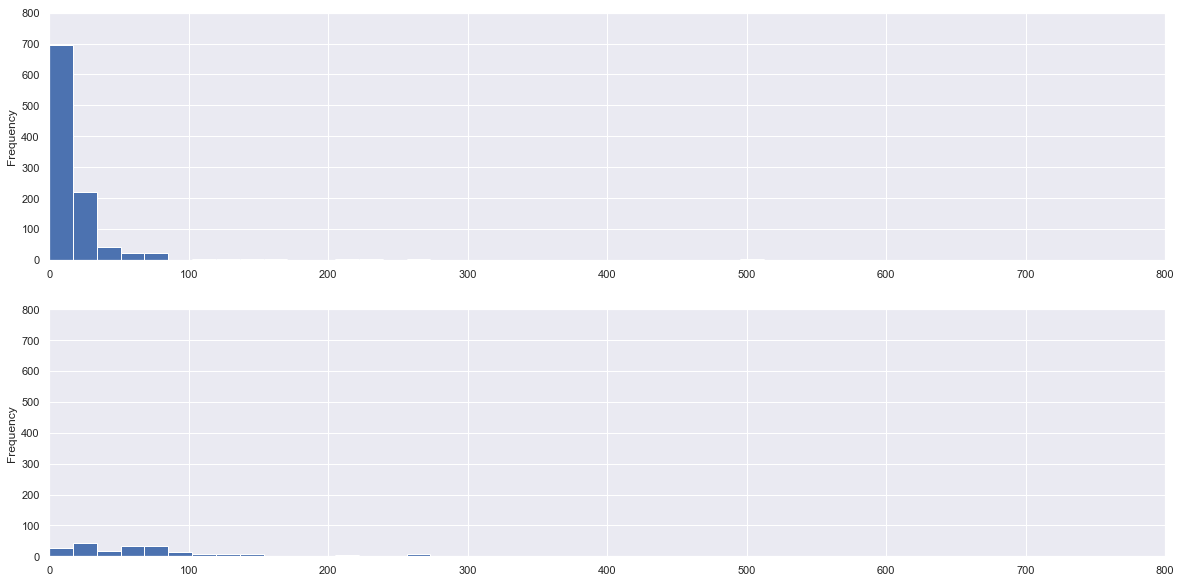

In [104]:
tickets = merged[Columns.Ticket]

df = merged

# 중복되는 ticket을 가진 사람들의 fare는? => 같다.
def show_shared_tickets(df):
    for ticket in tickets:
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            print("\nTicket:", ticket)
            print(df[df[Columns.Ticket] == ticket][Columns.Fare], df[df[Columns.Ticket] == ticket][Columns.Cabin], \
                  df[df[Columns.Ticket] == ticket][Columns.Embarked])

#show_shared_tickets(df)
            
'''
표에 액수가 중복되었다고 돈을 나눌 필요는 없을 것 같아서 주석 처리함.
ticket number가 중복이어도 돈을 나눠서 찍었을 수도 있어서...
'''
'''
def divide_fare_by_shared_tickets(df):
    for ticket in tickets:
        tmpdf = df[df[Columns.Ticket] == ticket]
        if tmpdf.shape[0] > 1:
            total_fare = df[df[Columns.Ticket] == ticket][Columns.Fare].value_counts().index[0]            
            per_people = df[df[Columns.Ticket] == ticket].shape[0]            
            df[df[Columns.Ticket] == ticket][Columns.Fare] = total_fare / per_people
    return df
            
df = divide_fare_by_shared_tickets(df)
'''


#cabin / fare
#non-cabin / fare

# cabin이 있고/없고에 따른 fare의 차이
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].set_xlim([0, 800])
ax[1].set_xlim([0, 800])
ax[0].set_ylim([0, 800])
ax[1].set_ylim([0, 800])
df = df[df[Columns.Cabin].isnull()]
df[Columns.Fare].plot.hist(ax=ax[0], bins=30)
print("No Cabin Fare:", df[Columns.Fare].mean())

df = train[train[Columns.Cabin].isnull() == False]
df[Columns.Fare].plot.hist(ax=ax[1], bins=30)
print("Cabin Fare:", df[Columns.Fare].mean())



In [105]:
merged.head(n=100)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title
0,1,0.0,3,0,22.00,A/5 21171,7.2500,NaN,S,2,1
1,2,1.0,1,1,38.00,PC 17599,71.2833,C85,C,2,2
2,3,1.0,3,1,26.00,STON/O2. 3101282,7.9250,NaN,S,1,2
3,4,1.0,1,1,35.00,113803,53.1000,C123,S,2,2
4,5,0.0,3,0,35.00,373450,8.0500,NaN,S,1,1
5,6,0.0,3,0,21.00,330877,8.4583,NaN,Q,1,1
6,7,0.0,1,0,54.00,17463,51.8625,E46,S,1,1
7,8,0.0,3,0,2.00,349909,21.0750,NaN,S,5,3
8,9,1.0,3,1,27.00,347742,11.1333,NaN,S,3,2
9,10,1.0,2,1,14.00,237736,30.0708,NaN,C,2,2


In [106]:
def divide_fare_by_shared_tickets(df):
    for ticket in tickets:
        tmpdf = df[df[Columns.Ticket] == ticket]
        if tmpdf.shape[0] > 1:
            total_fare = tmpdf[Columns.Fare].values[0]
            per_people = tmpdf.shape[0]            
            #df[df[Columns.Ticket] == ticket][Columns.Fare] = total_fare / per_people
            df.loc[df[Columns.Ticket] == ticket, [Columns.Fare]] = total_fare / per_people
    return df
            
#merged = divide_fare_by_shared_tickets(merged)
#merged.head(n=100)

Cabin이 빈 사람은 같은 Ticket번호를 가진 다른 사람의 Cabin을 넣는다.
=>16명밖에 안 되므로 별 의미가 없을 것 같다.
=>하지 말자

In [107]:
def empty_cabin_but_oterhs_have_cabin_cnt(df):
    ret = 0    
    # cabin이 null이면 ticket이 같은걸 찾아서 cabin값을 가져온다.
    for idx, row in df[df[Columns.Cabin].isnull() == True].iterrows(): #Cabin이 없는 행에 대해        
        ticket = row[Columns.Ticket]
        cabin = df[df[Columns.Ticket] == ticket][Columns.Cabin].value_counts().index #같은 ticket을 가진 사람들 중 가장 많은 Cabin값을 가져온다.
        if len(cabin) > 0: #Cabin이 있으면 현제 row는 Cabin이 없지만 채울 수 있는 것이다.
            #print(row)
            ret = ret + 1
            
            
    return ret

#print("count of fillable cabin : ", empty_cabin_but_oterhs_have_cabin_cnt(merged))

In [108]:
tm = merged.copy()

tickets = merged[Columns.Ticket]

# 중복되는 ticket을 가진 사람들의 cabin은?
# ==> cabin값이 비어 있으면 ticket이 같은 다른 사람들의 cabin값으로 채운다.
def fixup_cabin_by_ticket(df):
    # cabin이 null이면 ticket이 같은걸 찾아서 cabin값을 가져온다.
    fixed = 0
    iterdf = df[df[Columns.Cabin].isnull() == True].copy()
    for idx, row in iterdf.iterrows(): # 각각의 행의 값을 읽어들일 필요가 있을 때.
        ticket = row[Columns.Ticket] # 현재 행의 ticket값을 얻는다.
        # 같은 ticket을 가진 다른 사용자들의 Cabin값들을 얻어온다.
        cabin = df[df[Columns.Ticket] == ticket][Columns.Cabin].value_counts().index
        if len(cabin) > 0: # 다른 사용자에게 Cabin이 있으면 
            df.loc[idx, Columns.Cabin] = cabin[0] # 그 값을 사용한다.
    
    # 검증단계:
    for ticket in tickets:        
        if df[df[Columns.Ticket] == ticket].shape[0] > 1:
            # 다 null이거나 다 null이 아니건나 해야 한다.
            '''
            아래 나누어서 한 이유는 : 
            아래와 같이 하게 되면,
            if df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == True].shape[0] != 0 and df[df[Columns.Ticket] == ticket][df[Columns.Cabin].isnull() == False].shape[0] != 0:
            df[df[Columns.Ticket] == ticket]과 [df[Columns.Cabin].isnull() == True]의 크기가 달라져서,
            
                UserWarning: Boolean Series key will be reindexed to match DataFrame index.
            
            위와 같은 에러가 발생하기 때문이다.
            Pandas가 자동으로 index를 기준으로 boolean vector를 reindex해서 맞춰 주지만, implicit한 동작이어서 나중에 변경될 수 있으므로 warning으로 알려주는 것이다.
            다름 링크 내용을 참고한다.
            https://stackoverflow.com/questions/41710789/boolean-series-key-will-be-reindexed-to-match-dataframe-index            
            '''
            
            '''
            df2 = df[df[Columns.Ticket] == ticket] # ticket이 같은 것을 모두 모은다.
            if df2[df2[Columns.Cabin].isnull() == True].shape[0] != 0 and df2[df2[Columns.Cabin].isnull() == False].shape[0] != 0:
                print('Wrong!')
                print(df2[[Columns.Ticket, Columns.Cabin]])
            '''
    return df

#fixup_cabin_by_ticket(tm)

In [109]:
#merged = fixup_cabin_by_ticket(merged)

Cabin에서 알파벳을 추출해서 Deck항목을 추가한다.

In [110]:
def make_deck(df):
    '''
    Cabin에서 알파벳을 떼서 Deck 알파벳을 생성한다.
    '''
    df[Columns.Deck] = df[Columns.Cabin].str.extract('([A-Za-z]+)', expand=True)
    return df

merged = make_deck(merged)
merged.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309,1308.000000,295,1309,1309.000000,1309.000000,295
unique,NaN,NaN,NaN,NaN,NaN,929,NaN,186,3,NaN,NaN,8
top,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN,NaN,C
freq,NaN,NaN,NaN,NaN,NaN,11,NaN,6,916,NaN,NaN,94
mean,655.000000,0.383838,2.294882,0.355997,28.571176,NaN,33.295479,NaN,NaN,1.883881,1.514133,NaN
std,378.020061,0.486592,0.837836,0.478997,13.235687,NaN,51.758668,NaN,NaN,1.583639,0.696753,NaN
min,1.000000,0.000000,1.000000,0.000000,0.170000,NaN,0.000000,NaN,NaN,1.000000,1.000000,NaN
25%,328.000000,0.000000,2.000000,0.000000,21.000000,NaN,7.895800,NaN,NaN,1.000000,1.000000,NaN
50%,655.000000,0.000000,3.000000,0.000000,27.000000,NaN,14.454200,NaN,NaN,1.000000,1.000000,NaN
75%,982.000000,1.000000,3.000000,1.000000,35.000000,NaN,31.275000,NaN,NaN,2.000000,2.000000,NaN


In [111]:
merged[[Columns.Deck, Columns.Fare]].groupby(Columns.Deck).mean().sort_values(by=Columns.Fare)

,Fare
Deck,
G,14.205000
F,18.079367
T,35.500000
A,41.244314
D,53.007339
E,54.564634
C,107.926598
B,122.383078


Deck과 Survived의 상관관계를 확인하자.

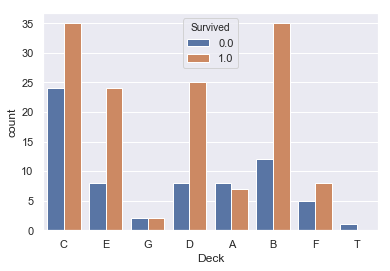

In [112]:
sns.countplot(x=Columns.Deck, hue=Columns.Survived, data=merged)

Deck과 Fare에 따라 생존 수를 확인해 본다.

total survived rate:  0.3838383838383838
deck survived rate:  0.6666666666666666
no deck survived rate:  0.29985443959243085
Fare : 0  ~  512
gap: 32
[-1, 0, 32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384, 416, 448, 480, inf]


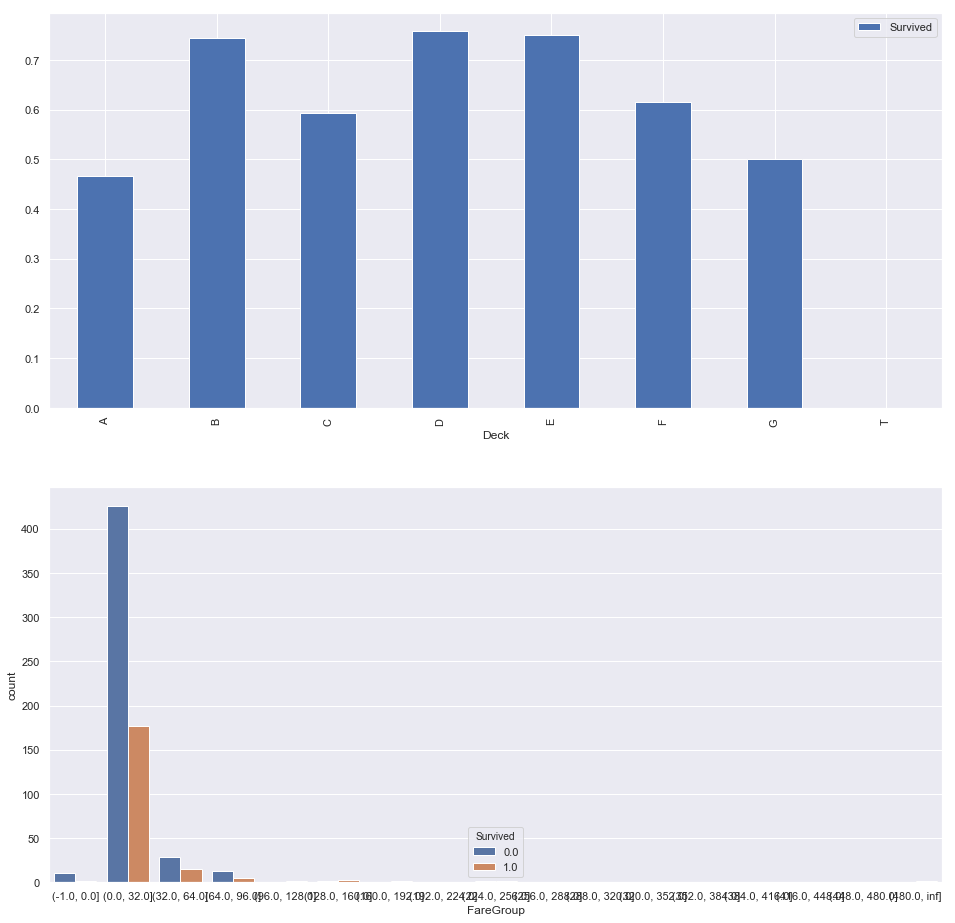

In [113]:
print("total survived rate: ", merged[Columns.Survived].mean())
print("deck survived rate: ", merged[merged[Columns.Deck].isnull() == False][Columns.Survived].mean())
print("no deck survived rate: ", merged[merged[Columns.Deck].isnull()][Columns.Survived].mean())

fig, ax = plt.subplots(2, 1, figsize=(16, 16))
merged[[Columns.Deck, Columns.Survived]].groupby(Columns.Deck).mean().plot.bar(ax=ax[0])

def generate_fare_group(df, slicenum):
    if "FareGroup" in df:
        df.drop("FareGroup", axis=1)
    # 나이대로 나누어서 출력해 본다.
    _min = df[Columns.Fare].min().astype('int')
    _max = df[Columns.Fare].max().astype('int')
    print("Fare :", _min, " ~ ", _max)
    gap = ((_max - _min) / slicenum).astype(int)
    print('gap:', gap)

    bins = [-1]
    for i in range(slicenum):
        bins.append(i * gap)
    bins.append(np.inf)
    print(bins)
    df['FareGroup'] = pd.cut(df[Columns.Fare], bins)    
    return df

df = generate_fare_group(merged.copy(), 16)

# deck 정보가 없는 사람들의 요금에 따른 생존자/사망자 수
sns.countplot(x="FareGroup", hue=Columns.Survived, data=df[df[Columns.Deck].isnull()], ax=ax[1])


처음에는 비어있는 Deck을 채워야 한다고 생각하였다.
그런데 Cabin이 있는 그룹과 없는 그룹간의 생존률 차이가 유의미하고, Cabin에서 추출한 Deck의 생존률이 다 평균은 넘으니 그냥 Cabin의 존재유무로 하는 것은 어떨까 하는 생각이 들었다.
그냥 Cabin의 존재유무 항목을 추가하자.

In [114]:
merged[Columns.CabinExists] = (merged[Columns.Cabin].isnull() == False)
merged[Columns.CabinExists] = merged[Columns.CabinExists].map({True:1, False:0})

In [115]:
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck,CabinExists
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,S,2,1,NaN,0
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,C,2,2,C,1
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2,NaN,0
3,4,1.0,1,1,35.0,113803,53.1000,C123,S,2,2,C,1
4,5,0.0,3,0,35.0,373450,8.0500,NaN,S,1,1,NaN,0


### Fare 정리

null인 항목이 있다.

In [116]:
merged[merged[Columns.Fare].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck,CabinExists
1043,1044,NaN,3,0,60.5,3701,NaN,NaN,S,1,1,NaN,0


하나만 있으므로 그냥 평균값을 넣어준다.

In [117]:
merged.loc[merged[Columns.Fare].isnull(), [Columns.Fare]] = merged[Columns.Fare].mean()

In [118]:
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck,CabinExists
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,S,2,1,NaN,0
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,C,2,2,C,1
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2,NaN,0
3,4,1.0,1,1,35.0,113803,53.1000,C123,S,2,2,C,1
4,5,0.0,3,0,35.0,373450,8.0500,NaN,S,1,1,NaN,0


Fare(요금) 항목의 분포를 check해 보자.

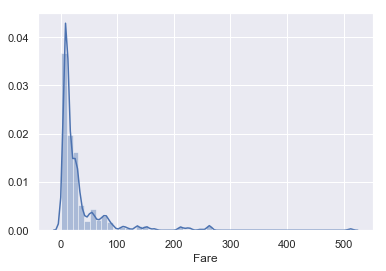

In [119]:
sns.distplot(merged[Columns.Fare])

distribution이 비대칭인 것을 알 수 있다.(high skewness). <br>
모델의 학습에 좋지 않은 영향을 미친다고 한다. <br>
outlier의 영향을 줄이기 위해 log를 취해서 값의 차이를 줄이거나 동수로 그룹을 나누어서 값을 배정하거나 할 수 있다.

In [120]:
'''
log를 취하는 방법
'''

#merged[Columns.Fare] = merged[Columns.Fare].map(lambda i : np.log(i) if i > 0 else 0)

'''
등급을 4단계로 나누는 방법
'''
merged[Columns.FareBand] = pd.qcut(merged[Columns.Fare], 4, labels=[1,2,3,4]).astype('float')
#merged[Columns.Fare] = merged[Columns.FareBand]

merged.head(n=20)


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck,CabinExists,FareBand
0,1,0.0,3,0,22.0,A/5 21171,7.2500,NaN,S,2,1,NaN,0,1.0
1,2,1.0,1,1,38.0,PC 17599,71.2833,C85,C,2,2,C,1,4.0
2,3,1.0,3,1,26.0,STON/O2. 3101282,7.9250,NaN,S,1,2,NaN,0,2.0
3,4,1.0,1,1,35.0,113803,53.1000,C123,S,2,2,C,1,4.0
4,5,0.0,3,0,35.0,373450,8.0500,NaN,S,1,1,NaN,0,2.0
5,6,0.0,3,0,21.0,330877,8.4583,NaN,Q,1,1,NaN,0,2.0
6,7,0.0,1,0,54.0,17463,51.8625,E46,S,1,1,E,1,4.0
7,8,0.0,3,0,2.0,349909,21.0750,NaN,S,5,3,NaN,0,3.0
8,9,1.0,3,1,27.0,347742,11.1333,NaN,S,3,2,NaN,0,2.0
9,10,1.0,2,1,14.0,237736,30.0708,NaN,C,2,2,NaN,0,3.0


In [121]:
merged[Columns.Fare] = merged[Columns.FareBand]

In [122]:
merged[Columns.Fare] = merged[Columns.FareBand]
merged = merged.drop([Columns.FareBand], axis=1)
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck,CabinExists
0,1,0.0,3,0,22.0,A/5 21171,1.0,NaN,S,2,1,NaN,0
1,2,1.0,1,1,38.0,PC 17599,4.0,C85,C,2,2,C,1
2,3,1.0,3,1,26.0,STON/O2. 3101282,2.0,NaN,S,1,2,NaN,0
3,4,1.0,1,1,35.0,113803,4.0,C123,S,2,2,C,1
4,5,0.0,3,0,35.0,373450,2.0,NaN,S,1,1,NaN,0


In [123]:
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck,CabinExists
0,1,0.0,3,0,22.0,A/5 21171,1.0,NaN,S,2,1,NaN,0
1,2,1.0,1,1,38.0,PC 17599,4.0,C85,C,2,2,C,1
2,3,1.0,3,1,26.0,STON/O2. 3101282,2.0,NaN,S,1,2,NaN,0
3,4,1.0,1,1,35.0,113803,4.0,C123,S,2,2,C,1
4,5,0.0,3,0,35.0,373450,2.0,NaN,S,1,1,NaN,0


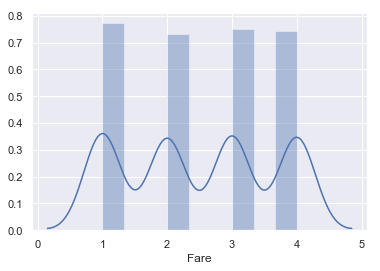

In [124]:
sns.distplot(merged[Columns.Fare])

In [125]:
merged.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck,CabinExists
0,1,0.0,3,0,22.0,A/5 21171,1.0,NaN,S,2,1,NaN,0
1,2,1.0,1,1,38.0,PC 17599,4.0,C85,C,2,2,C,1
2,3,1.0,3,1,26.0,STON/O2. 3101282,2.0,NaN,S,1,2,NaN,0
3,4,1.0,1,1,35.0,113803,4.0,C123,S,2,2,C,1
4,5,0.0,3,0,35.0,373450,2.0,NaN,S,1,1,NaN,0


Embarked 채움

In [126]:
print(merged[merged[Columns.Embarked].isnull()])
#sns.countplot(x=Columns.Embarked, hue=Columns.Survived, data=merged)
# 둘 다 살아 있으니 그냥 생존률이 높은 곳으로 넣어주자.
#merged[merged[Columns.Embarked].isnull()][Columns.Embarked] = 2.0
#merged.loc[merged[Columns.Embarked].isnull(), [Columns.Embarked]] = 2.0
merged.loc[lambda df : df[Columns.Embarked].isnull(), [Columns.Embarked]] = 2.0
print(merged[merged[Columns.Embarked].isnull()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, Ticket, Fare, Cabin, Embarked, Family, Title, Deck, CabinExists]
Index: []
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, Ticket, Fare, Cabin, Embarked, Family, Title, Deck, CabinExists]
Index: []


In [127]:
merged.describe(include='all')


,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,Title,Deck,CabinExists
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309,1309.000000,295,1309,1309.000000,1309.000000,295,1309.000000
unique,NaN,NaN,NaN,NaN,NaN,929,NaN,186,3,NaN,NaN,8,NaN
top,NaN,NaN,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN,NaN,C,NaN
freq,NaN,NaN,NaN,NaN,NaN,11,NaN,6,916,NaN,NaN,94,NaN
mean,655.000000,0.383838,2.294882,0.355997,28.571176,NaN,2.488159,NaN,NaN,1.883881,1.514133,NaN,0.225363
std,378.020061,0.486592,0.837836,0.478997,13.235687,NaN,1.122833,NaN,NaN,1.583639,0.696753,NaN,0.417981
min,1.000000,0.000000,1.000000,0.000000,0.170000,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,0.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,NaN,0.000000
50%,655.000000,0.000000,3.000000,0.000000,27.000000,NaN,2.000000,NaN,NaN,1.000000,1.000000,NaN,0.000000
75%,982.000000,1.000000,3.000000,1.000000,35.000000,NaN,3.000000,NaN,NaN,2.000000,2.000000,NaN,0.000000


전처리가 다 되었으면 다음 과정을 수행한다.

- 불필요한 열 삭제
- scaling
- train/test로 다시 분리
- train을 input/label로 분리(Survived)

불필요한 열 삭제

In [128]:
if Columns.Ticket in merged:
    merged = merged.drop(labels=[Columns.Ticket], axis=1)
if Columns.Cabin in merged:
    merged = merged.drop(labels=[Columns.Cabin], axis=1)
if Columns.Deck in merged:
    merged = merged.drop(labels=[Columns.Deck], axis=1)

# passengerId는 나중에 삭제한다.
# if Columns.PassengerId in merged:
#     merged = merged.drop(labels=[Columns.PassengerId], axis=1)

In [129]:
merged.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title,CabinExists
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,916,NaN,NaN,NaN
mean,655.000000,0.383838,2.294882,0.355997,28.571176,2.488159,NaN,1.883881,1.514133,0.225363
std,378.020061,0.486592,0.837836,0.478997,13.235687,1.122833,NaN,1.583639,0.696753,0.417981
min,1.000000,0.000000,1.000000,0.000000,0.170000,1.000000,NaN,1.000000,1.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,1.000000,NaN,1.000000,1.000000,0.000000
50%,655.000000,0.000000,3.000000,0.000000,27.000000,2.000000,NaN,1.000000,1.000000,0.000000
75%,982.000000,1.000000,3.000000,1.000000,35.000000,3.000000,NaN,2.000000,2.000000,0.000000


In [130]:
merged.head(n=10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title,CabinExists
0,1,0.0,3,0,22.0,1.0,S,2,1,0
1,2,1.0,1,1,38.0,4.0,C,2,2,1
2,3,1.0,3,1,26.0,2.0,S,1,2,0
3,4,1.0,1,1,35.0,4.0,S,2,2,1
4,5,0.0,3,0,35.0,2.0,S,1,1,0
5,6,0.0,3,0,21.0,2.0,Q,1,1,0
6,7,0.0,1,0,54.0,4.0,S,1,1,1
7,8,0.0,3,0,2.0,3.0,S,5,3,0
8,9,1.0,3,1,27.0,2.0,S,3,2,0
9,10,1.0,2,1,14.0,3.0,C,2,2,0


카테고리 데이터를 one-hot 인코딩을 해주는 것이 좋다.<br>
- Pclass
- Embarked
- Title

In [131]:
merged = pd.get_dummies(merged, columns=[Columns.Pclass], prefix='Pclass')
merged = pd.get_dummies(merged, columns=[Columns.Title], prefix='Title')
merged = pd.get_dummies(merged, columns=[Columns.Embarked], prefix='Embarked')
merged.head()

,PassengerId,Survived,Sex,Age,Fare,Family,CabinExists,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,0,22.0,1.0,2,0,0,0,1,1,0,0,0,0,0,0,1
1,2,1.0,1,38.0,4.0,2,1,1,0,0,0,1,0,0,0,1,0,0
2,3,1.0,1,26.0,2.0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,4,1.0,1,35.0,4.0,2,1,1,0,0,0,1,0,0,0,0,0,1
4,5,0.0,0,35.0,2.0,1,0,0,0,1,1,0,0,0,0,0,0,1


수치 데이터는 일정 값으로 scaling 해주는 것이 필요하다.<br>
입력 데이터를 0~1로 scaling하는 함수

In [132]:
from sklearn.preprocessing import MinMaxScaler

class NoColumnError(Exception):
    """Raised when no column in dataframe"""
    def __init__(self, value):
        self.value = value
    # __str__ is to print() the value
    def __str__(self):
        return(repr(self.value))

# normalize AgeGroup
def normalize_column(data, columnName):
    scaler = MinMaxScaler(feature_range=(0, 1))    
    if columnName in data:
        aaa = scaler.fit_transform(data[columnName].values.reshape(-1, 1)) # 입력을 2D 데이터로 넣어야 하므로 reshape해 준다.
        aaa = aaa.reshape(-1,) # 다시 원복해서 넣어주지만, 그냥 넣어도 알아서 제대로 들어간다...
        #print(aaa.shape)
        data[columnName] = aaa
        return data
    else:
        raise NoColumnError(str(columnName) + " is not exists!")

def normalize(dataset, columns):
    for col in columns:
        dataset = normalize_column(dataset, col)
    return dataset

In [133]:
merged.head()

,PassengerId,Survived,Sex,Age,Fare,Family,CabinExists,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,0,22.0,1.0,2,0,0,0,1,1,0,0,0,0,0,0,1
1,2,1.0,1,38.0,4.0,2,1,1,0,0,0,1,0,0,0,1,0,0
2,3,1.0,1,26.0,2.0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,4,1.0,1,35.0,4.0,2,1,1,0,0,0,1,0,0,0,0,0,1
4,5,0.0,0,35.0,2.0,1,0,0,0,1,1,0,0,0,0,0,0,1


In [134]:
merged = normalize(merged, [Columns.Age, Columns.Fare, Columns.Family])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [135]:
merged.head(n=10)

,PassengerId,Survived,Sex,Age,Fare,Family,CabinExists,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,0,0.273456,0.000000,0.1,0,0,0,1,1,0,0,0,0,0,0,1
1,2,1.0,1,0.473882,1.000000,0.1,1,1,0,0,0,1,0,0,0,1,0,0
2,3,1.0,1,0.323563,0.333333,0.0,0,0,0,1,0,1,0,0,0,0,0,1
3,4,1.0,1,0.436302,1.000000,0.1,1,1,0,0,0,1,0,0,0,0,0,1
4,5,0.0,0,0.436302,0.333333,0.0,0,0,0,1,1,0,0,0,0,0,0,1
5,6,0.0,0,0.260929,0.333333,0.0,0,0,0,1,1,0,0,0,0,0,1,0
6,7,0.0,0,0.674308,1.000000,0.0,1,1,0,0,1,0,0,0,0,0,0,1
7,8,0.0,0,0.022924,0.666667,0.4,0,0,0,1,0,0,1,0,0,0,0,1
8,9,1.0,1,0.336089,0.333333,0.2,0,0,0,1,0,1,0,0,0,0,0,1
9,10,1.0,1,0.173243,0.666667,0.1,0,0,1,0,0,1,0,0,0,1,0,0


merged를 train/test로 분리한다.

In [136]:
train = merged[:train_len]
test = merged[train_len:]
test = test.drop([Columns.Survived], axis=1)

train = train.drop([Columns.PassengerId], axis=1)

test_passenger_id = test[Columns.PassengerId]
test = test.drop([Columns.PassengerId], axis=1)

print(train.shape)
print(test.shape)

(891, 17)
(418, 16)


In [138]:
train_X = train.drop([Columns.Survived], axis=1).values #Series.values는 numpy array 타입의 데이터임
train_Y = train[Columns.Survived].values.reshape(-1, 1)
print(train_X.shape)
print(train_Y.shape)

(891, 16)
(891, 1)


In [139]:
test.shape

(418, 16)

In [140]:
test.describe(include='all')

,Sex,Age,Fare,Family,CabinExists,Pclass_1,Pclass_2,Pclass_3,Title_1,Title_2,Title_3,Title_4,Title_5,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000
mean,0.363636,0.359269,0.495215,0.083971,0.217703,0.255981,0.222488,0.521531,0.574163,0.361244,0.050239,0.014354,0.0,0.244019,0.110048,0.645933
std,0.481622,0.163191,0.382962,0.151907,0.413179,0.436934,0.416416,0.500135,0.495062,0.480937,0.218700,0.119088,0.0,0.430019,0.313324,0.478803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.260929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.323563,0.333333,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
75%,1.000000,0.445697,1.000000,0.100000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,1.000000,0.949894,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [144]:
import keras
from keras import layers, models

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold

train_X = train_X.astype(np.float32)
train_Y = train_Y.astype(np.float32)
print(train_X.shape)
print(train_Y.shape)

print(test.shape)

class SimpleNN(models.Sequential):
    def __init__(self, input_shape, dropout):
        super().__init__()
        
        self.add(layers.Dense(units=20, activation='relu', input_shape=input_shape))
        self.add(layers.Dropout(dropout))
        
        self.add(layers.Dense(units=8, activation='relu'))
        self.add(layers.Dropout(dropout))
        
        self.add(layers.Dense(units=1, activation='sigmoid'))
        self.add(layers.Dropout(dropout))
        
        self.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

batch_size = 32
epochs = 250
dropout = 0.2

kfold = KFold(n_splits=8, shuffle=True, random_state=7)

cvscores = []
models = []
for _train, _test in kfold.split(train_X, train_Y):
    model = SimpleNN(input_shape=(train_X.shape[1],), dropout=dropout)
    history = model.fit(train_X[_train], train_Y[_train], epochs=epochs, batch_size=batch_size, verbose=0)
    #evaluate model:
    scores = model.evaluate(train_X[_test], train_Y[_test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    models.append(model)

print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
maxidx = np.argmax(cvscores)
print("Max : [", maxidx, "] : ", "{0:.2f}".format(cvscores[maxidx]))

pred = models[maxidx].predict(test, batch_size=test.shape[0], verbose=0)

from sklearn.preprocessing import Binarizer
binarizer=Binarizer(0.5)

test_predict_result=binarizer.fit_transform(pred)
test_predict_result=test_predict_result.astype(np.int32)
#print(test_predict_result[:10])
submission = pd.DataFrame({"PassengerId" : test_passenger_id, "Survived":test_predict_result.reshape(-1)})
submission.to_csv('submission.csv', index=False)


(891, 16)
(891, 1)
(418, 16)
acc: 83.93%
acc: 78.57%
acc: 80.36%
acc: 85.59%
acc: 85.59%
acc: 87.39%
acc: 88.29%
acc: 76.58%
83.29% (+/- 4.01%)
Max : [ 6 ] :  88.29
